# Problem 2: Training a CNN using CIFAR-10 Data [50pts]
1. Warm-up: Load the dataset and check how the images look like [3pts]




In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten, Activation, Dropout
from keras.optimizers import SGD 
from keras.layers import BatchNormalization

In [23]:
# Load the data and Split it into train and test data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [24]:
# Check the structure of the data
print('The structure of the training data for X is:', X_train.shape, ', and for y is', y_train.shape)
print('The structure of the teat data for X is:', X_test.shape, ', and for y is', y_test.shape)

The structure of the training data for X is: (50000, 32, 32, 3) , and for y is (50000, 1)
The structure of the teat data for X is: (10000, 32, 32, 3) , and for y is (10000, 1)


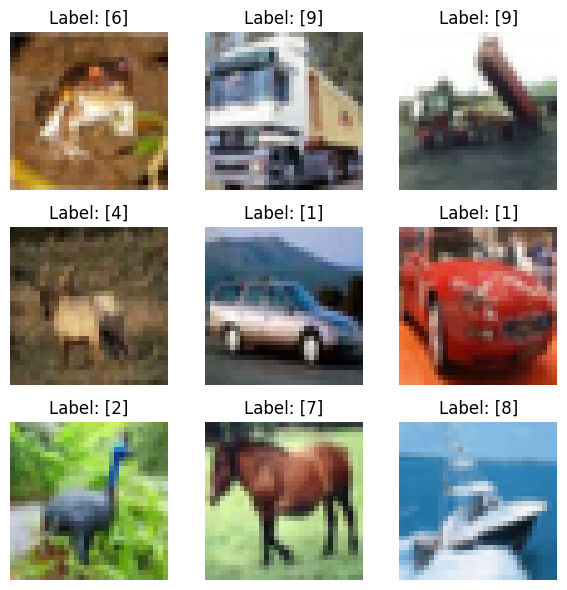

In [25]:
# Check how the images look like
figure, axes = plt.subplots(nrows=3, ncols=3, figsize=(6,6))

for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i])
    ax.set_title(f"Label: {y_train[i]}")
    ax.axis('off')  # to hide the axes for each subplot

plt.tight_layout()
plt.show()

2. Train a CNN with three hidden convolutional layers that use the ReLU activation
function. Use 64 11×11 filters for the first layer, followed by 2×2 max pooling (stride of 2). The next two convolutional layers will use 128 3×3 filters followed by the ReLU activation function. Prior to the softmax layer, you should have an average pooling layer that pools across the preceding feature map. Do not use a pre-trained CNN. Train your model using all of the CIFAR-10 training data, and evaluate your trained system on the CIFAR-10 test data. Display the training loss as a function of epochs. What is the accuracy on the test data? How did you initialize the weights? Discuss your architecture and hyper-parameters. [20pts]

In [26]:
# Normalize data
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# Convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Define the model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(64, (11, 11), padding='same', activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

# 2nd Convolutional Layer
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))

# 3rd Convolutional Layer
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))

# Global Average Pooling Layer
model.add(keras.layers.GlobalAveragePooling2D())

# Softmax Layer
model.add(Dense(num_classes, activation='softmax'))

# Initialize the optimizer and model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Display model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test), shuffle=True)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 32, 32, 64)        23296     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 conv2d_11 (Conv2D)          (None, 16, 16, 128)       147584    
                                                                 
 global_average_pooling2d_3   (None, 128)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_3 (Dense)             (None, 10)               

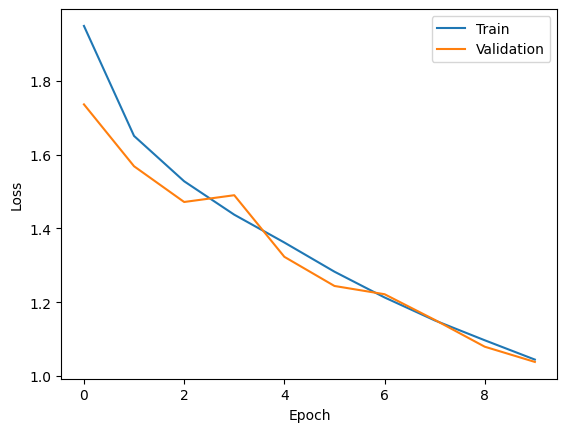

In [7]:
# Plot Loss
plt.plot(history.history['loss'], label = 'Train')
plt.plot(history.history['val_loss'], label = 'Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

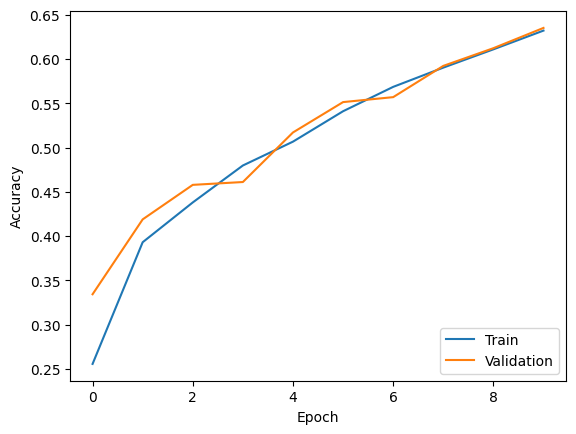

In [9]:
# Plot accuracy
plt.plot(history.history['accuracy'], label = 'Train')
plt.plot(history.history['val_accuracy'], label = 'Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [10]:
# Evaluate the model on test data
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 1s 5ms/step - loss: 1.0381 - accuracy: 0.6352
Test loss: 1.0380754470825195
Test accuracy: 0.635200023651123


Discuss architecture and hyper-parameters:

Architecture: This model consists of three convolutional layers, each followed by ReLU activation. The first one has 64 filters of 11x11, followed by max pooling. The second and third layers have 128 filters of 3x3. The last layer is a global average pooling layer, followed by a softmax layer for output.

Initialization: By default, the weights in Keras Conv2D layers are initialized using Glorot Uniform initializer, which is a good practice in deep learning.

Optimizer: I used SGD (Stochastic Gradient Descent) with a learning rate of 0.01 and momentum of 0.9. These are common settings for SGD, but they could be tuned.

Epochs and batch size: I trained for 10 epochs with a batch size of 32. Increasing the number of epochs could potentially improve performance, at the risk of overfitting. The batch size can also be tuned based on memory limitations and how noisy the gradient estimates are.

3. Visualize all of the 11×11×3 filters learned by the first convolutional layer as an RGB image array (I suggest making a large RGB image that is made up of each of the smaller images, so it will have 4 rows and 16 columns). Note that you will need to normalize each filter by contrast stretching to do this visualization, i.e., for each filter subtract the smallest value and then divide by the new largest value. [7pts]

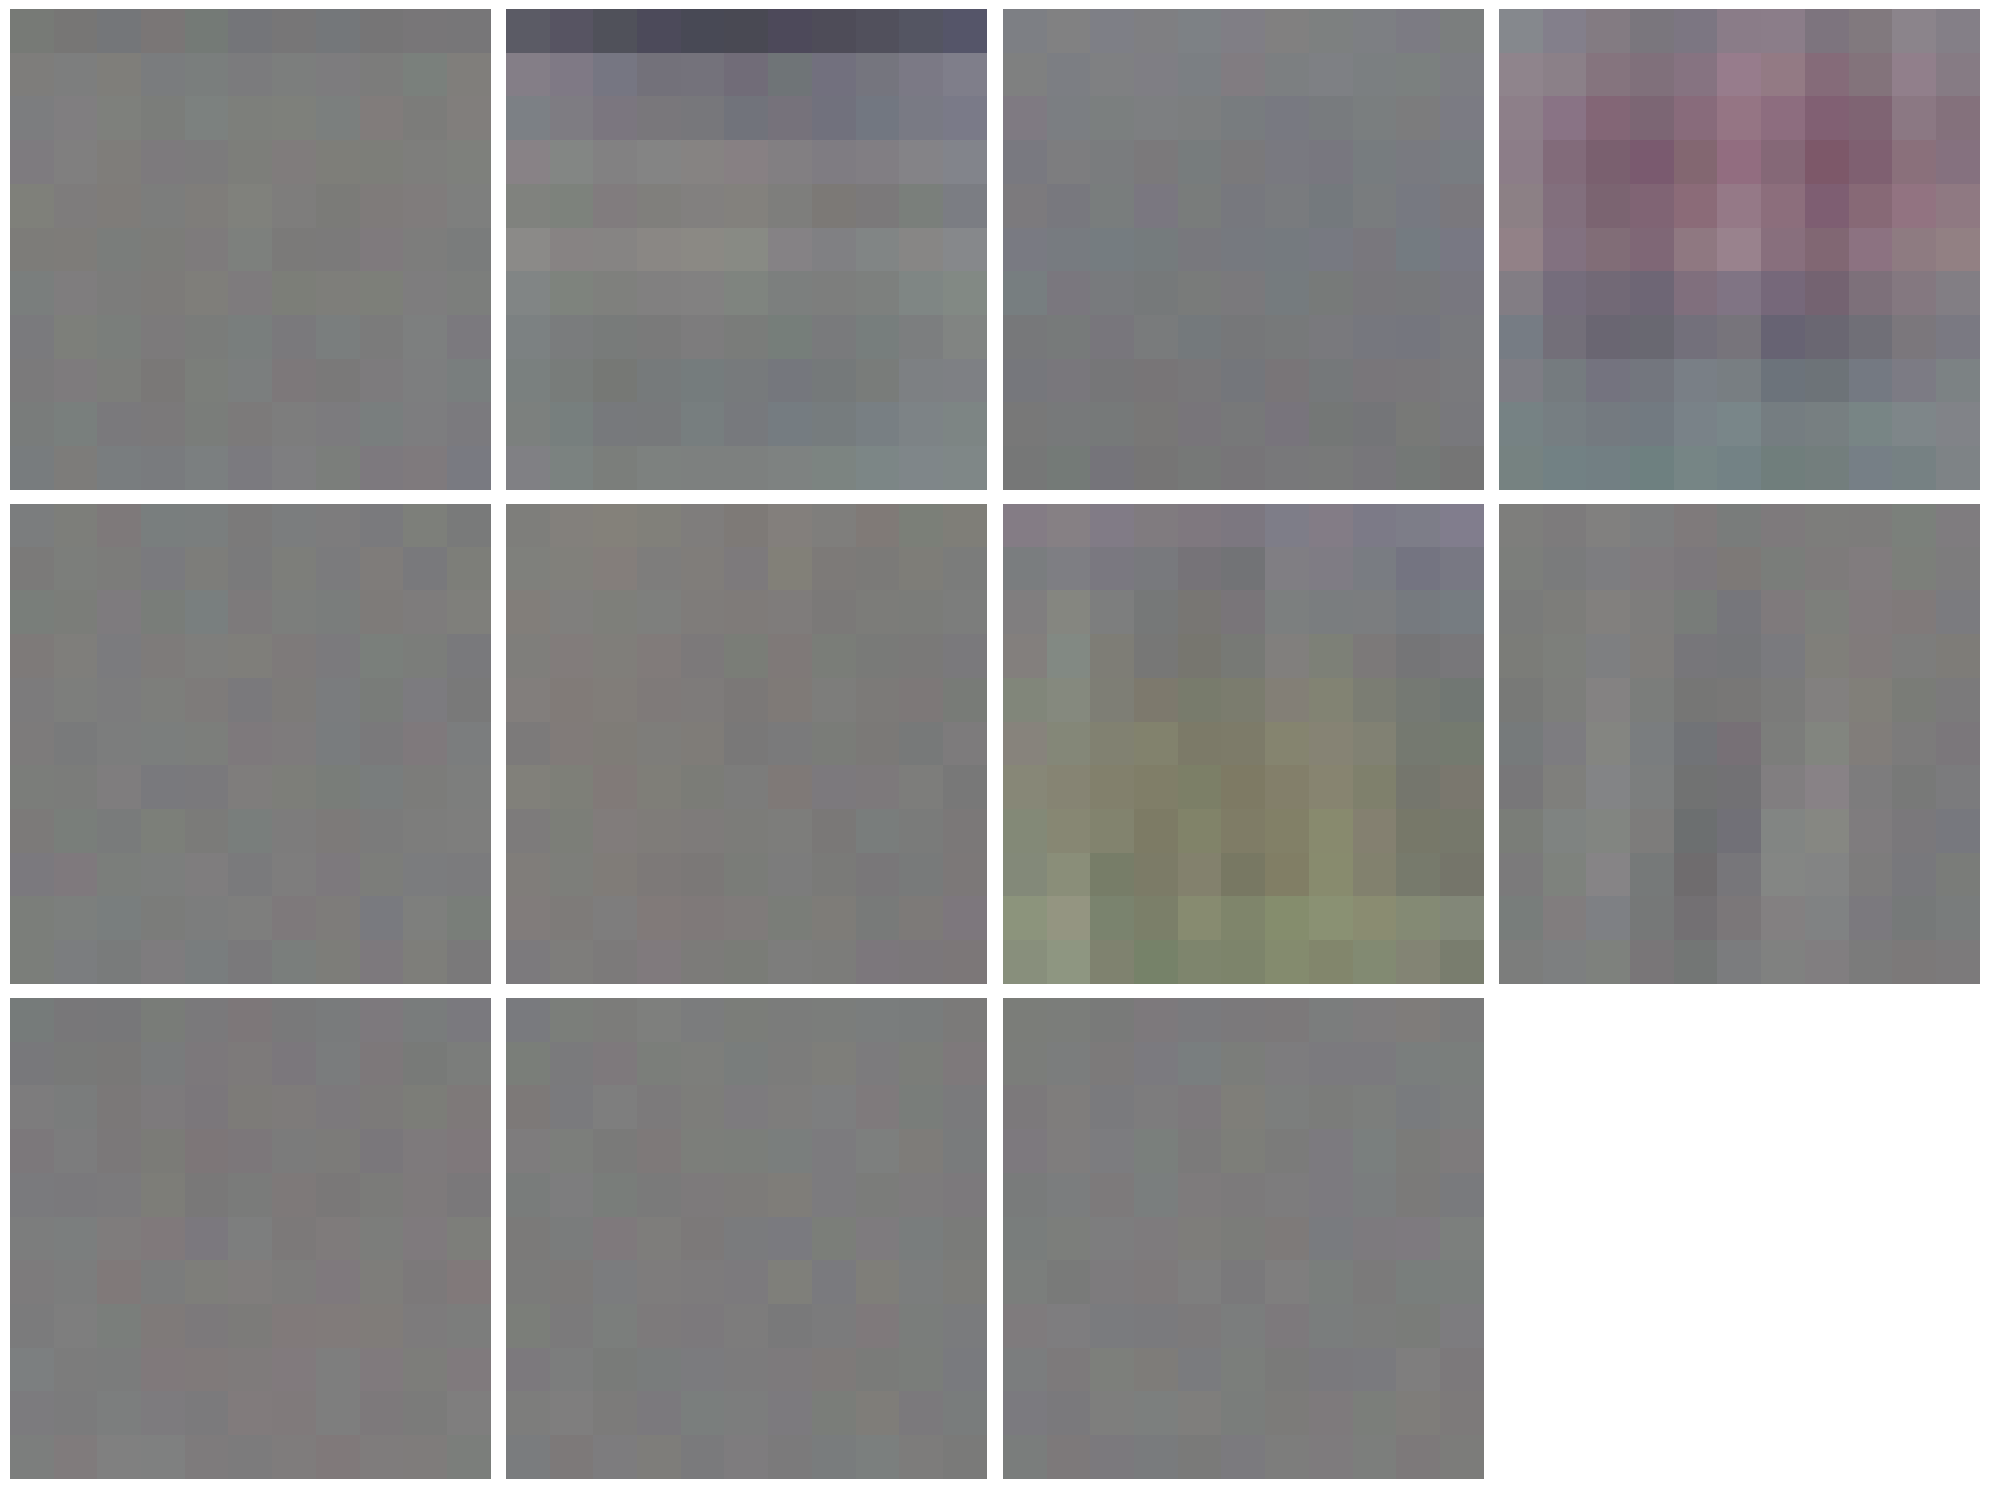

In [14]:
# retrieve weights from the first hidden layer
filters, bias = model.layers[0].get_weights()

# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

# Number of filters to show
n_filters = 11

# Number of rows and columns for our grid of subplots
n_rows = 3
n_columns = 4

# Create a grid of subplots
fig, axs = plt.subplots(n_rows, n_columns, figsize=(20, 15))

# Initialize filter index
filter_index = 0

for i in range(n_rows):
    for j in range(n_columns):
        # If we're within the total number of filters, show this filter
        if filter_index < n_filters:
            # get the filter
            f = filters[:, :, :, filter_index]
            # plot the filter
            axs[i, j].imshow(f)
            axs[i, j].axis('off')
            # Increment filter index
            filter_index += 1
        # If we're outside the total number of filters, hide this subplot
        else:
            axs[i, j].axis('off')

# Show the plot
plt.tight_layout()
plt.show()

4. Using the same architecture, add in batch normalization between each of the hidden layers. Compare the training loss with and without batch normalization as a function of epochs. What is the final test error? Visualize the filters. [20pts]

In [15]:
# Define the model architecture
model_with_bn = Sequential()

# Add the first convolutional layer
model_with_bn.add(Conv2D(64, (11, 11), padding='same', input_shape=X_train.shape[1:]))
model_with_bn.add(BatchNormalization())
model_with_bn.add(Activation('relu'))
model_with_bn.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Add the second convolutional layer
model_with_bn.add(Conv2D(128, (3, 3), padding='same'))
model_with_bn.add(BatchNormalization())
model_with_bn.add(Activation('relu'))

# Add the third convolutional layer
model_with_bn.add(Conv2D(128, (3, 3), padding='same'))
model_with_bn.add(BatchNormalization())
model_with_bn.add(Activation('relu'))

# Add average pooling layer
model_with_bn.add(tf.keras.layers.GlobalAveragePooling2D())

# Add the output layer
model_with_bn.add(Dense(num_classes))
model_with_bn.add(Activation('softmax'))

# Compile the model
model_with_bn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
# Train the model
history_with_bn = model_with_bn.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), shuffle=True)

# Evaluate the model
_, test_acc_with_bn = model_with_bn.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', test_acc_with_bn)

Epoch 1/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.0184 - accuracy: 0.6399 - val_loss: 1.7052 - val_accuracy: 0.4199
Epoch 2/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.9264 - accuracy: 0.6730 - val_loss: 2.8258 - val_accuracy: 0.3044
Epoch 3/10
1563/1563 [==============================] - 15s 9ms/step - loss: 0.8687 - accuracy: 0.6954 - val_loss: 1.3011 - val_accuracy: 0.5724
Epoch 4/10
1563/1563 [==============================] - 13s 9ms/step - loss: 0.8162 - accuracy: 0.7143 - val_loss: 1.0664 - val_accuracy: 0.6246
Epoch 5/10
1563/1563 [==============================] - 13s 9ms/step - loss: 0.7778 - accuracy: 0.7269 - val_loss: 0.9809 - val_accuracy: 0.6568
Epoch 6/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.7341 - accuracy: 0.7439 - val_loss: 1.8931 - val_accuracy: 0.4902
Epoch 7/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.7039 - accuracy: 0.7537 - val_loss: 1.3007 - val_a

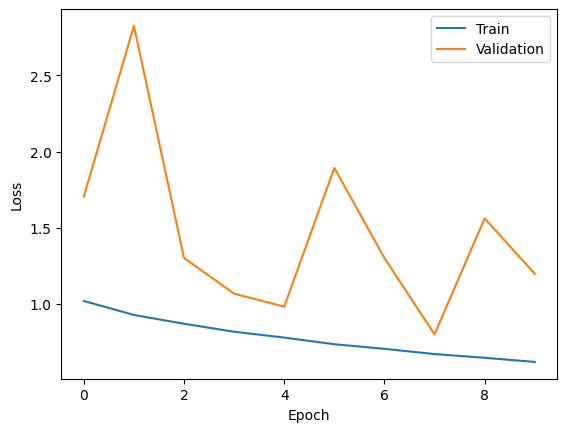

In [18]:
# Plot Loss
plt.plot(history_with_bn.history['loss'], label = 'Train')
plt.plot(history_with_bn.history['val_loss'], label = 'Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

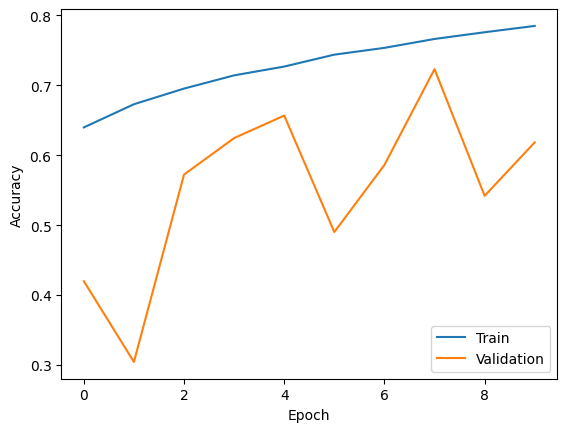

In [19]:
# Plot accuracy
plt.plot(history_with_bn.history['accuracy'], label = 'Train')
plt.plot(history_with_bn.history['val_accuracy'], label = 'Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [20]:
# Evaluate the model on test data
scores = model_with_bn.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 2s 5ms/step - loss: 1.1974 - accuracy: 0.6185
Test loss: 1.1973655223846436
Test accuracy: 0.6184999942779541


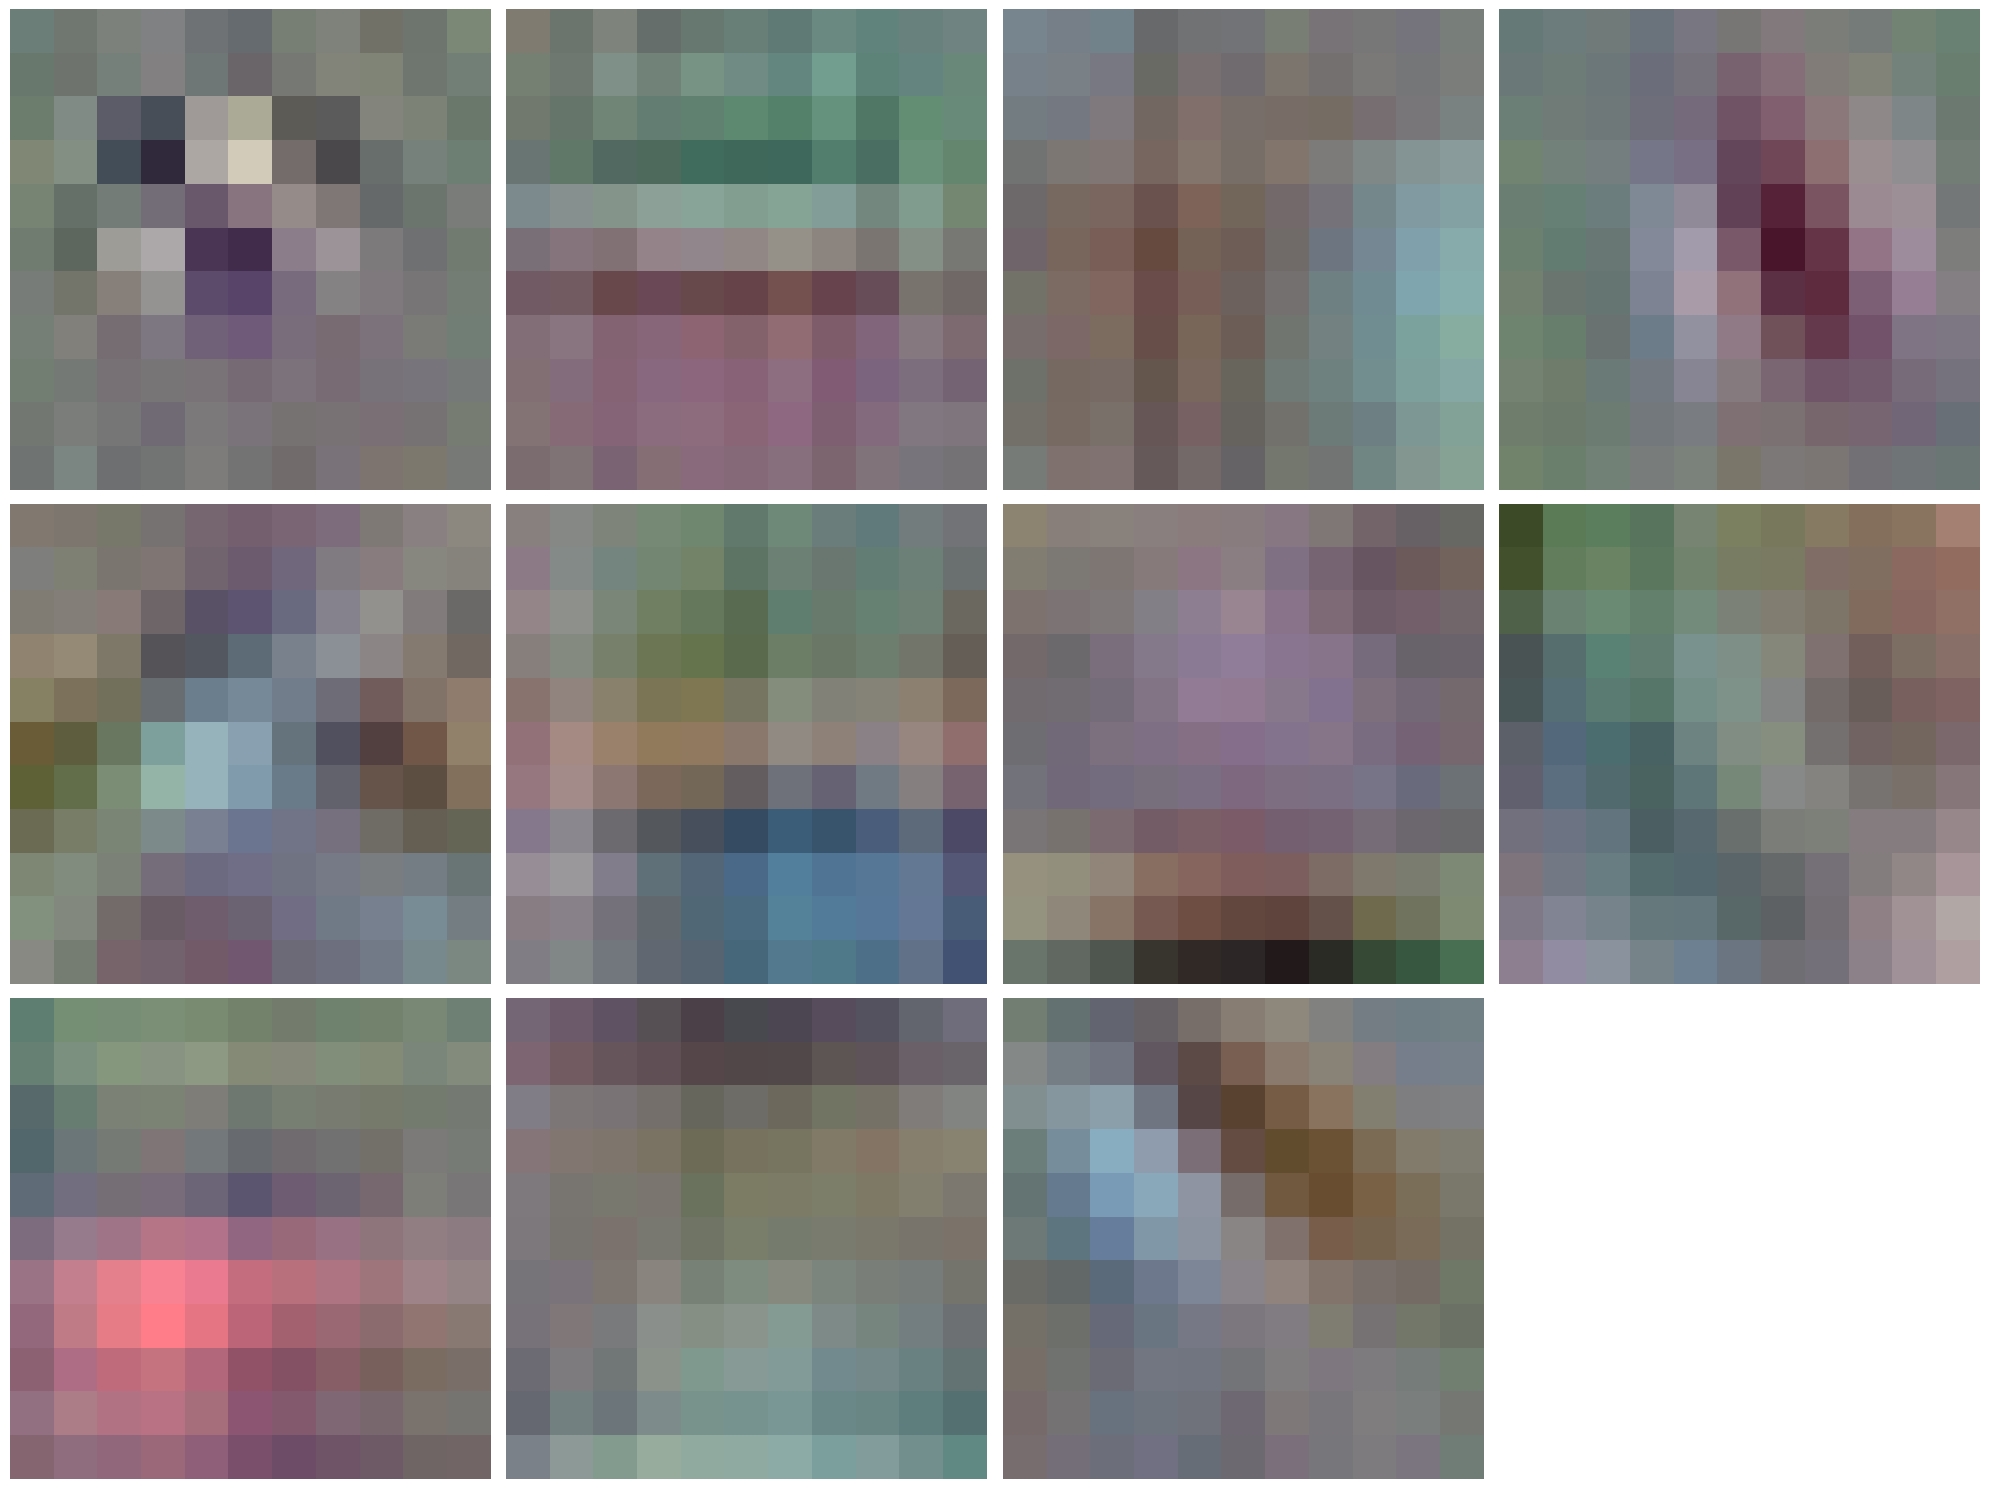

In [21]:
# retrieve weights from the first hidden layer
filters, bias = model_with_bn.layers[0].get_weights()

# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

# Number of filters to show
n_filters = 11

# Number of rows and columns for our grid of subplots
n_rows = 3
n_columns = 4

# Create a grid of subplots
fig, axs = plt.subplots(n_rows, n_columns, figsize=(20, 15))

# Initialize filter index
filter_index = 0

for i in range(n_rows):
    for j in range(n_columns):
        # If we're within the total number of filters, show this filter
        if filter_index < n_filters:
            # get the filter
            f = filters[:, :, :, filter_index]
            # plot the filter
            axs[i, j].imshow(f)
            axs[i, j].axis('off')
            # Increment filter index
            filter_index += 1
        # If we're outside the total number of filters, hide this subplot
        else:
            axs[i, j].axis('off')

# Show the plot
plt.tight_layout()
plt.show()

# Problem 3: GAN using Fasion-MNIST Data [40pts]

In [7]:
from tqdm.autonotebook import tqdm
%matplotlib inline
from IPython import display
import pandas as pd
import glob
import imageio
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization, Reshape, Flatten

1. Vanilla GAN [20pts]

Train a basic GAN that can generate images from the Fashion-MNIST dataset. Plot your training loss curves for your G and D. Show the generated samples from G in 1) the beginning of the training; 2) intermediate stage of the training, and 3) after convergence.

In [11]:
import os
if not os.path.exists('images'):
    os.makedirs('images')

In [4]:
# First, let's define the generator and discriminator models
latent_dim = 100  # size of the latent space

# Generator model
def create_generator():
    model = Sequential()
    model.add(Dense(256, input_dim=latent_dim))
    model.add(LeakyReLU(0.2))
    model.add(Dense(512))
    model.add(LeakyReLU(0.2))
    model.add(Dense(1024))
    model.add(LeakyReLU(0.2))
    model.add(Dense(784, activation='tanh'))  # because we are dealing with images
    model.add(Reshape((28, 28, 1)))
    return model

# Discriminator model
def create_discriminator():
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28, 1)))
    model.add(Dense(1024))
    model.add(LeakyReLU(0.2))
    model.add(Dense(512))
    model.add(LeakyReLU(0.2))
    model.add(Dense(256))
    model.add(LeakyReLU(0.2))
    model.add(Dense(1, activation='sigmoid'))  # because it's binary classification
    model.compile(loss='binary_crossentropy', optimizer=Adam())
    return model

In [5]:
# Now, let's create a combined model where we will train the generator and the discriminator together.
# Combined model
def create_gan(discriminator, generator):
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    model.compile(loss='binary_crossentropy', optimizer=Adam())
    return model

In [9]:
# Next, let's load the data and train the GAN.
# Load data
(X_train, y_train), (_, _) = fashion_mnist.load_data()
X_train = X_train.astype('float32') / 255 * 2 - 1  # normalize and scale between -1 and 1
X_train = np.expand_dims(X_train, axis=3)

In [17]:
# Create GAN
generator = create_generator()
discriminator = create_discriminator()
gan = create_gan(discriminator, generator)

# Training parameters
epochs = 2000
batch_size = 32
sample_interval = 100  # interval for displaying generated images

# Labels for real and fake images
real = np.ones((batch_size, 1))
fake = np.zeros((batch_size, 1))

# Initialize losses list
losses = []

for epoch in range(epochs):

    # Train Discriminator
    idx = np.random.randint(0, X_train.shape[0], batch_size)
    imgs = X_train[idx]

    z = np.random.normal(0, 1, (batch_size, latent_dim))
    gen_imgs = generator.predict(z)

    d_loss_real = discriminator.train_on_batch(imgs, real)
    d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    # Train Generator
    z = np.random.normal(0, 1, (batch_size, latent_dim))
    g_loss = gan.train_on_batch(z, real)

    if epoch % sample_interval == 0:
        print("Epoch %d [D loss: %f] [G loss: %f]" % (epoch, d_loss, g_loss))

        # Save losses for plotting
        losses.append((d_loss, g_loss))

        # Save generated images
        gen_imgs = 0.5 * gen_imgs + 0.5  # Rescale images 0 - 1
        fig, axs = plt.subplots(5, 5)
        count = 0
        for i in range(5):
            for j in range(5):
                axs[i, j].imshow(gen_imgs[count, :, :, 0], cmap='gray')
                axs[i, j].axis('off')
                count += 1
        fig.savefig("images/%d.png" % epoch)
        plt.close()

1/1 [==============================] - 0s 60ms/step
Epoch 0 [D loss: 0.748389] [G loss: 0.868723]
1/1 [==============================] - 0s 80ms/step
Epoch 100 [D loss: 0.148446] [G loss: 4.654323]
1/1 [==============================] - 0s 19ms/step
Epoch 200 [D loss: 0.007598] [G loss: 13.184310]
1/1 [==============================] - 0s 15ms/step
Epoch 300 [D loss: 2.188025] [G loss: 13.757229]
1/1 [==============================] - 0s 15ms/step
Epoch 400 [D loss: 0.000023] [G loss: 26.280842]
1/1 [==============================] - 0s 16ms/step
Epoch 500 [D loss: 0.199203] [G loss: 23.953392]
1/1 [==============================] - 0s 18ms/step
Epoch 600 [D loss: 0.227473] [G loss: 11.134253]
1/1 [==============================] - 0s 19ms/step
Epoch 700 [D loss: 0.687535] [G loss: 16.932661]
1/1 [==============================] - 0s 23ms/step
Epoch 800 [D loss: 0.480317] [G loss: 20.798281]
1/1 [==============================] - 0s 15ms/step
Epoch 900 [D loss: 3.135795] [G loss: 32.59

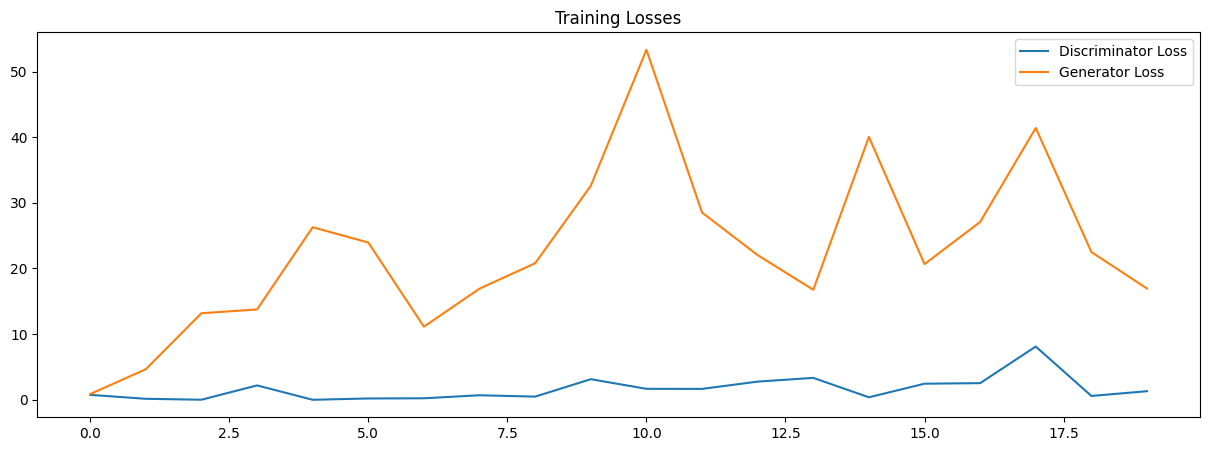

In [18]:
losses = np.array(losses)

# Plot training losses for Discriminator and Generator
plt.figure(figsize=(15, 5))
plt.plot(losses.T[0], label="Discriminator Loss")
plt.plot(losses.T[1], label="Generator Loss")
plt.title("Training Losses")
plt.legend()
plt.show()

In [19]:
# Create GIF
images = []
for filename in sorted(glob.glob('images/*.png'), key=os.path.getmtime):
    images.append(imageio.imread(filename))
imageio.mimsave('gan.gif', images, fps=3)

<ipython-input-19-5a4794f35215>:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


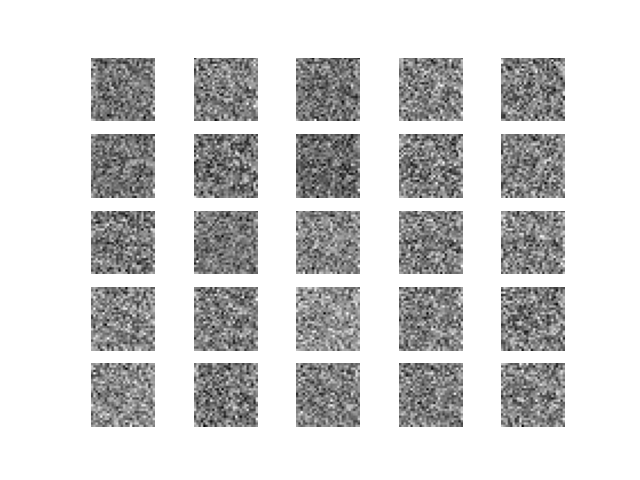

In [20]:
# Show the whole process
from IPython.display import Image
Image(filename="gan.gif")

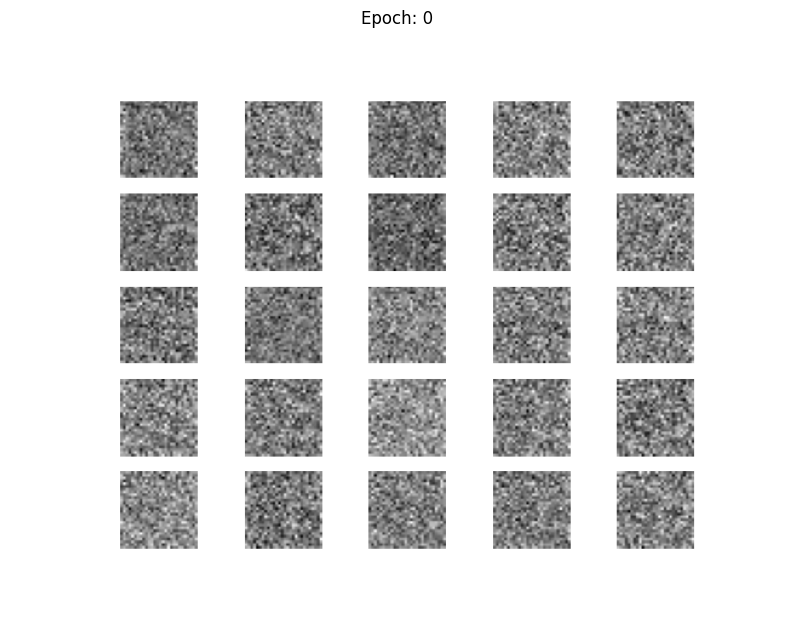

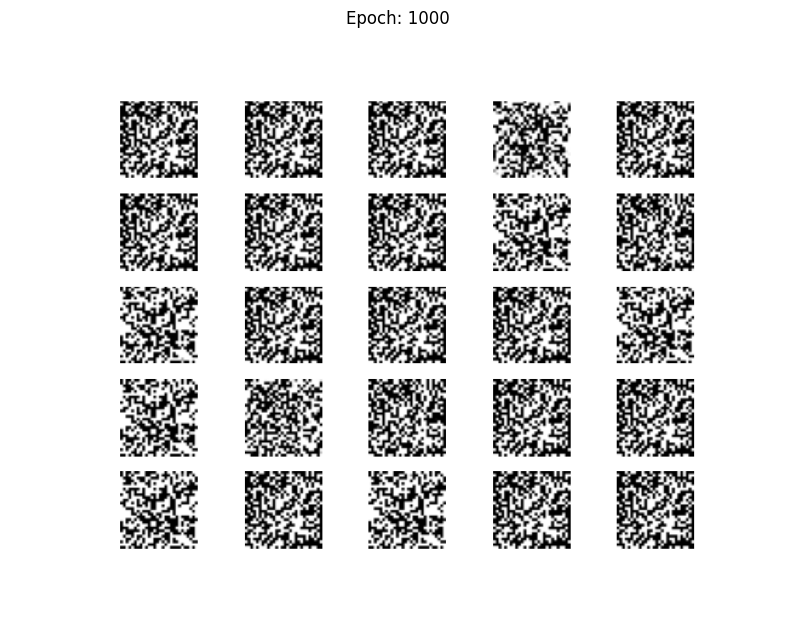

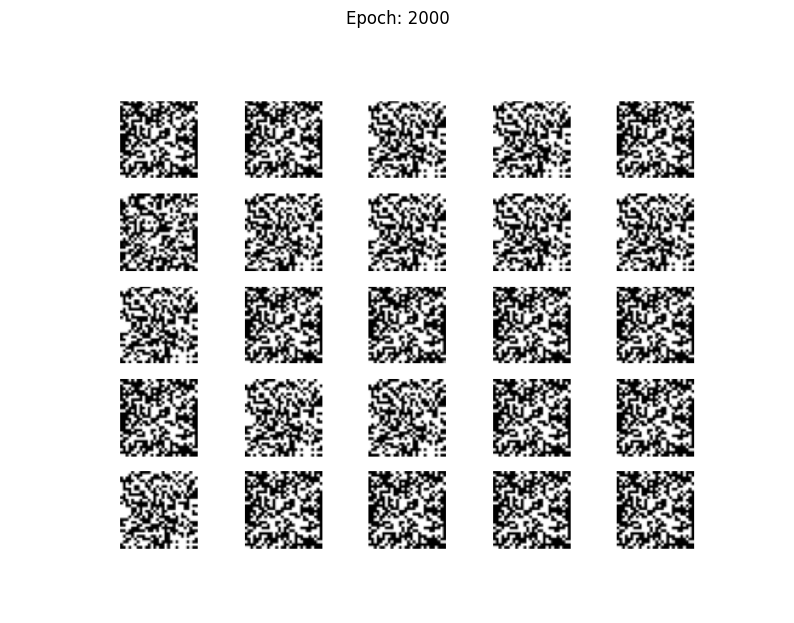

In [23]:
# Show plot 0, plot 1000 and plot 2000
import matplotlib.image as mpimg

# Plot for epoch 0
img = mpimg.imread('images/0.png')
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.axis('off')
plt.title('Epoch: 0')
plt.show()

# Plot for epoch 1000
img = mpimg.imread('images/1000.png')
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.axis('off')
plt.title('Epoch: 1000')
plt.show()

# Plot for epoch 2000
img = mpimg.imread('images/1900.png')
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.axis('off')
plt.title('Epoch: 2000')
plt.show()

2. Mode Collapse in GANs [20pts]

Train an unrolled GAN and plot the histogram from 3000 generated samples. Discuss whether unrolled GAN seems to help reduce the mode collapse problem.

In [24]:
# First, let's load the Fashion-MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Reshape data for Conv2D layer
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# Convert labels to categorical
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [25]:
# Let's clone the discriminator and convert its output layer to a 10-unit dense layer
# Clone the discriminator
classifier = keras.models.clone_model(discriminator)

# Remove the last layer (sigmoid layer)
classifier.pop()

# Add a new dense layer with 10 output units
classifier.add(layers.Dense(10, activation='softmax'))

# Compile the model
classifier.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Display the model architecture
classifier.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_37 (Dense)            (None, 1024)              803840    
                                                                 
 leaky_re_lu_27 (LeakyReLU)  (None, 1024)              0         
                                                                 
 dense_38 (Dense)            (None, 512)               524800    
                                                                 
 leaky_re_lu_28 (LeakyReLU)  (None, 512)               0         
                                                                 
 dense_39 (Dense)            (None, 256)               131328    
                                                                 
 leaky_re_lu_29 (LeakyReLU)  (None, 256)             

In [26]:
# Next, let's train (fine-tune) the classifier on the Fashion-MNIST dataset
# Train the classifier
history = classifier.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 10s 4ms/step - loss: 0.5014 - accuracy: 0.8177 - val_loss: 0.4805 - val_accuracy: 0.8317
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3954 - accuracy: 0.8565 - val_loss: 0.3779 - val_accuracy: 0.8675
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3568 - accuracy: 0.8706 - val_loss: 0.4007 - val_accuracy: 0.8578
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3363 - accuracy: 0.8760 - val_loss: 0.3846 - val_accuracy: 0.8648
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3197 - accuracy: 0.8801 - val_loss: 0.3918 - val_accuracy: 0.8605
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3066 - accuracy: 0.8863 - val_loss: 0.4226 - val_accuracy: 0.8527
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2954 - accuracy: 0.8907 - val_loss: 0.3651 - val_accuracy

In [27]:
# Generate 3000 samples using the generator
# Generate noise
noise = np.random.normal(0, 1, (3000, 100))

# Generate samples
samples = generator.predict(noise)

94/94 [==============================] - 0s 2ms/step


In [28]:
# Predict the class labels of the samples
# Predict class labels
labels = classifier.predict(samples)

# Convert predicted probabilities to labels
predicted_labels = np.argmax(labels, axis=1)

94/94 [==============================] - 0s 2ms/step


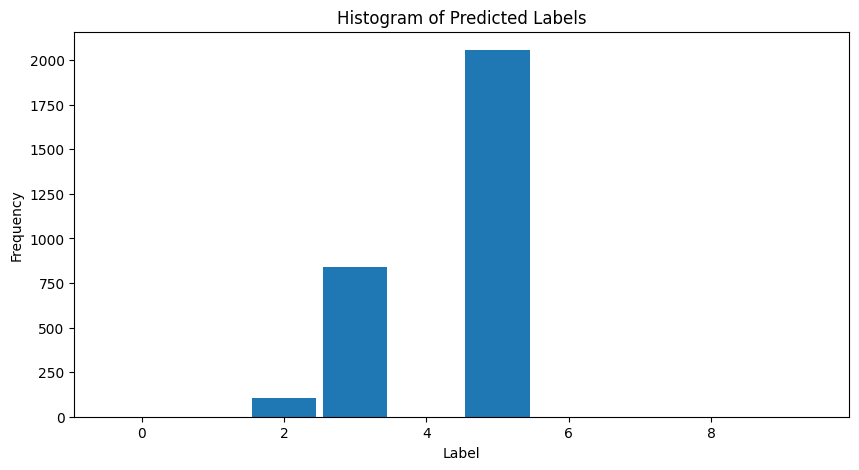

In [29]:
# Now let's plot the histogram of the predicted labels
plt.figure(figsize=(10, 5))
plt.hist(predicted_labels, bins=range(11), align='left', rwidth=0.9)
plt.title("Histogram of Predicted Labels")
plt.xlabel("Label")
plt.ylabel("Frequency")
plt.show()